In [56]:
import pandas as pd

In [57]:
stocks_df= pd.read_csv("DowJones.csv")
stocks_df.head()   

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [58]:
stocks_df.shape

(1989, 7)

In [59]:
stocks_df['Bulls/Bears score'] = stocks_df['Close'] - stocks_df['Open']
selected_columns = ['Date', 'Bulls/Bears score','Volume']
new_stocks_df = stocks_df[selected_columns]
new_stocks_df.head()

,Date,Bulls/Bears score,Volume
0,2016-07-01,25.128907,82160000
1,2016-06-30,217.230468,133030000
2,2016-06-29,238.660157,106380000
3,2016-06-28,219.210937,112190000
4,2016-06-27,-214.970704,138740000


In [60]:
news_of_daily_stocks= pd.read_csv("day_wise_news_cleaned.csv")
total_stock = pd.merge(new_stocks_df, news_of_daily_stocks, on='Date', how='inner')

# Display the merged dataframe
total_stock.head()

,Date,Bulls/Bears score,Volume,Stocks_news_of_the_day,Publication,URL,Source
0,2016-07-01,25.128907,82160000,"""fatal tesla crash raises concerns over self d...",New York Times,http://www.nytimes.com/2016/07/01/business/sel...,business
1,2016-06-30,217.230468,133030000,"""self driving tesla involved in fatal crash un...",New York Times,http://www.nytimes.com/2016/07/01/business/sel...,business
2,2016-06-29,238.660157,106380000,"""trump clinton’s focus on trade gap worries ch...",New York Times,http://www.nytimes.com/2016/06/30/business/int...,business
3,2016-06-28,219.210937,112190000,"""murder in 4 0 enduring heroin market shapes e...",New York Times,http://www.nytimes.com/2016/06/28/nyregion/an-...,market
4,2016-06-27,-214.970704,138740000,"""despite assurances markets left nervous""; ""de...",New York Times,http://www.nytimes.com/2016/06/28/business/int...,business


In [61]:
total_stock.drop(columns=["Publication", "URL", "Source"], inplace=True)

In [62]:
from textblob import TextBlob

def get_sentiment_score(headline):
    blob = TextBlob(headline)
    return blob.sentiment.polarity

# Split multiple headlines and apply sentiment analysis
total_stock['Sentiment_Score'] = total_stock['Stocks_news_of_the_day'].str.split(';').apply(
    lambda headlines: sum(get_sentiment_score(headline) for headline in headlines) / len(headlines))

# Display the DataFrame with sentiment scores
total_stock.head()

# Function to analyze sentiment using TextBlob
# def analyze_sentiment(text):
#     blob = TextBlob(text)
#     sentiment_score = blob.sentiment.polarity
#     return sentiment_score

# # Apply sentiment analysis to the 'Stocks_news_of_the_day' column
# total_stock['Sentiment_Score'] = total_stock['Stocks_news_of_the_day'].apply(analyze_sentiment)

# # Display the DataFrame with sentiment scores
# total_stock[['Date', 'Stocks_news_of_the_day', 'Sentiment_Score','Bulls/Bears score', 'Volume']].head()

,Date,Bulls/Bears score,Volume,Stocks_news_of_the_day,Sentiment_Score
0,2016-07-01,25.128907,82160000,"""fatal tesla crash raises concerns over self d...",-0.002383
1,2016-06-30,217.230468,133030000,"""self driving tesla involved in fatal crash un...",0.050000
2,2016-06-29,238.660157,106380000,"""trump clinton’s focus on trade gap worries ch...",-0.038580
3,2016-06-28,219.210937,112190000,"""murder in 4 0 enduring heroin market shapes e...",0.050000
4,2016-06-27,-214.970704,138740000,"""despite assurances markets left nervous""; ""de...",0.029722


In [67]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the 'Bulls/Bears score' column
scaler.fit(total_stock[['Bulls/Bears score']])

# Transform the 'Bulls/Bears score' column using the scaler
total_stock['Standardized_Bulls_Bears'] = scaler.transform(total_stock[['Bulls/Bears score']])

scaler.fit(total_stock[['Volume']])

# Transform the 'Volume' column using the scaler
total_stock['Standardized_Volume'] = scaler.transform(total_stock[['Volume']])

scaler.fit(total_stock[['Sentiment_Score']])

# Transform the 'Volume' column using the scaler
total_stock['Standardized_Sentiment'] = scaler.transform(total_stock[['Sentiment_Score']])

# Display the DataFrame with the standardized column
total_stock.tail()


,Date,Bulls/Bears score,Volume,Stocks_news_of_the_day,Sentiment_Score,Standardized_Bulls_Bears,Standardized_Volume,Standardized_Sentiment
1978,2008-08-14,83.859376,159790000,"""inflation hits annual pace seen since 1991""; ...",0.071429,0.567087,-0.026871,0.470610
1979,2008-08-13,-99.849609,182550000,"""weak retail sales report sends stocks down""; ...",0.133681,-0.739443,0.216504,1.267386
1980,2008-08-12,-139.230468,173590000,"""cost cutting in new york boom in india""; ""sec...",-0.046970,-1.019518,0.120694,-1.044793
1981,2008-08-11,52.679687,183190000,"""giant retailers look to sun for energy saving...",-0.013636,0.345339,0.223347,-0.618153
1982,2008-08-08,302.230468,212830000,"""oil prices tumble stock markets surge""; ""stoc...",0.045455,2.120133,0.540291,0.138164


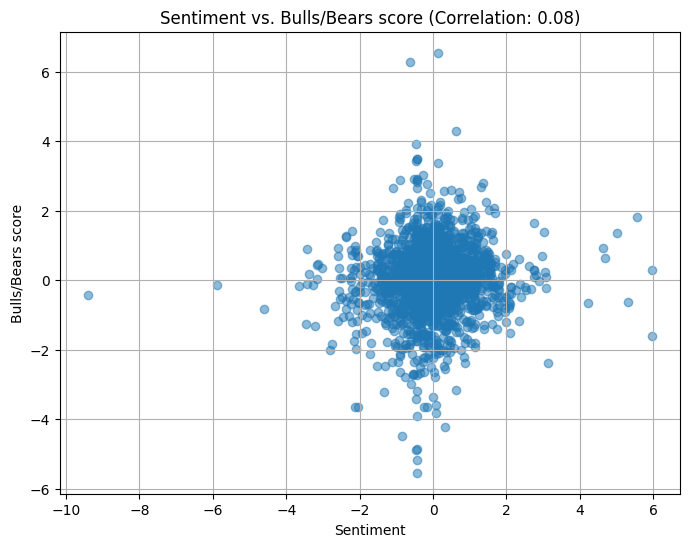

In [69]:
import matplotlib.pyplot as plt
import numpy as np

correlation = np.corrcoef(total_stock['Standardized_Sentiment'], total_stock['Standardized_Bulls_Bears'])[0, 1]

# Plotting the correlation chart
plt.figure(figsize=(8, 6))
plt.scatter(total_stock['Standardized_Sentiment'], total_stock['Standardized_Bulls_Bears'], alpha=0.5)
plt.title(f"Sentiment vs. Bulls/Bears score (Correlation: {correlation:.2f})")
plt.xlabel('Sentiment')
plt.ylabel('Bulls/Bears score')
plt.grid(True)
plt.show()

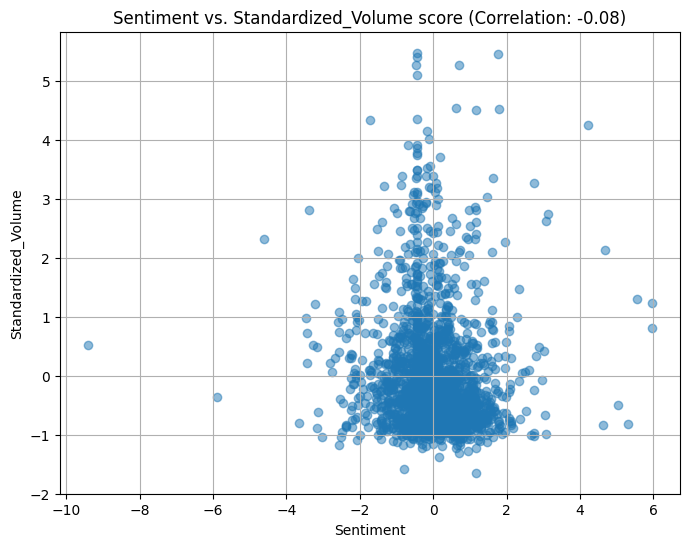

In [71]:


correlation = np.corrcoef(total_stock['Standardized_Sentiment'], total_stock['Standardized_Volume'])[0, 1]

# Plotting the correlation chart
plt.figure(figsize=(8, 6))
plt.scatter(total_stock['Standardized_Sentiment'], total_stock['Standardized_Volume'], alpha=0.5)
plt.title(f"Sentiment vs. Standardized_Volume score (Correlation: {correlation:.2f})")
plt.xlabel('Sentiment')
plt.ylabel('Standardized_Volume')
plt.grid(True)
plt.show()

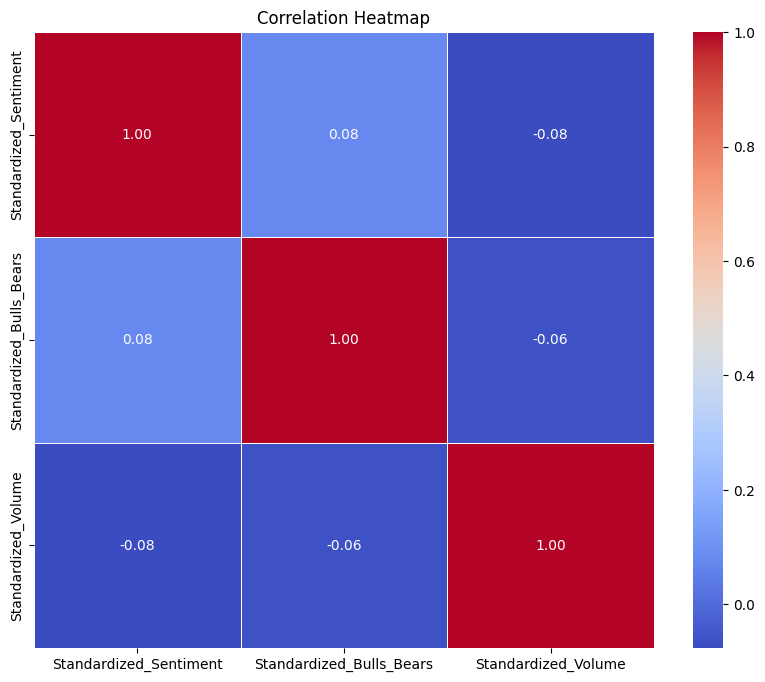

In [73]:
import seaborn as sns

# Extract numerical columns for correlation calculation
numerical_columns = ['Standardized_Sentiment', 'Standardized_Bulls_Bears', 'Standardized_Volume']

# Calculate the correlation matrix
correlation_matrix = total_stock[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
